# 提取文本

参考
- https://mp.weixin.qq.com/s/6JOdvO9y2RnZievyvD__ZA
- https://mp.weixin.qq.com/s/2ZEYUdMpT5aOLivzZHK0OA 

- https://mp.weixin.qq.com/s/q_jGovApFIll6VASaatuWw 
- https://mp.weixin.qq.com/s/_XViV-koFTOH-x1Ba1xWWg 

In [1]:
import os 
# 修改当前工作目录
path = "C:/Users/1013h/Anaconda3/code/微信聊天记录生成词云图"
# 查看修改后的工作目录
os.chdir(path)
print(os.getcwd())

C:\Users\1013h\Anaconda3\code\微信聊天记录生成词云图


In [2]:
#!/usr/bin/python
import pandas
import csv, sqlite3
conn= sqlite3.connect('chat_log.db')
# 新建数据库为 chat_log.db 替换成自己的聊天记录
df = pandas.read_csv('./chat_logs.csv', sep=",",encoding = "utf-8")
# 读取上一步提取出来的csv文件，这里要改成你自己的文件名
df.to_sql('my_chat', conn, if_exists='append', index=False)


C:\Users\1013h\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[聊天记录数据解析规则参考](https://blog.csdn.net/qq_21687123/article/details/104229675?spm=1001.2101.3001.6650.3&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-3.pc_relevant_default&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-3.pc_relevant_default&utm_relevant_index=5)

In [3]:
# 存入my_chat表中
conn = sqlite3.connect('chat_log.db') 
# 连接数据库
cursor = conn.cursor()
# 获得游标
cursor.execute('select content from my_chat where length(content)<30') 
# 将content长度限定30以下，因为content中有时候会有微信发过来的东西  
value=cursor.fetchall()
# fetchall返回筛选结果
 
data=open("聊天记录.txt",'w+',encoding='utf-8') 
for i in value:
    data.write(i[0]+'\n')
# 将筛选结果写入 聊天记录.txt
 
data.close()
cursor.close()
conn.close()
# 关闭连接

# 分词

In [4]:
#coding:utf-8
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs语言代码处理包
import pandas   #数据分析包

def load_file_segment():
    # 读取文本文件并分词
    f = codecs.open(u"聊天记录.txt",'r',encoding='utf-8')
    # 打开文件
    content = f.read()
    # 读取文件到content中
    f.close()
    # 关闭文件
    segment=[]
    # 保存分词结果
    segs=jieba.cut(content) 
    # 对整体进行分词
    for seg in segs:
        if len(seg) > 1 and seg != '\r\n':
            # 如果说分词得到的结果非单字，且不是换行符，则加入到数组中
            segment.append(seg)
    return segment

segment = load_file_segment()
# 获得分词结果

df = pandas.DataFrame({'segment':segment})
# 将分词数组转化为pandas数据结构

stopwords=pandas.read_csv("./stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf-8")
# 加载停用词

df=df[~df.segment.isin(stopwords.stopword)]
# 如果不是在停用词中

words_stat=df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})


words_stat=words_stat.reset_index().sort_values(by="计数",ascending=False)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\1013h\AppData\Local\Temp\jieba.cache
Loading model cost 1.093 seconds.
Prefix dict has been built successfully.
C:\Users\1013h\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


In [5]:
# 生成词频示例
words_stat.head(2)

,segment,计数
18209,拥抱,4410
12266,嘻嘻,3488


# 词云图

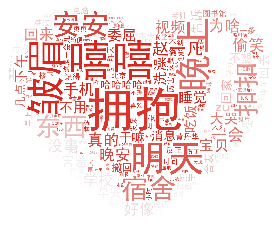

In [8]:
import matplotlib.pyplot as plt
from imageio import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from wordcloud import WordCloud#词云包

bimg = imread('./heart.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='./simhei.ttf')
#wordcloud=wordcloud.fit_words(words_stat.head(4000).itertuples(index=False))
words = words_stat.set_index("segment").to_dict()
wordcloud=wordcloud.fit_words(words["计数"])
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()